In [1]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob

# Camera Calibration
# 1. Compute Camera matrix and distortion coefficients to calibrate camera

In [2]:
# function to calibrate the camera
def calibrate_camera(gray, obj_points, img_points):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    return ret, mtx, dist, rvecs, tvecs

# function that returns an image after distortion correction
def correct_for_distortion(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

# function to warp an image
#def warped_image(img, nx, ny, mtx, dist):

In [3]:
# specifying number of corners in an image
nx = 9 # number of corners in the x direction
ny = 6 # number of corners in the y direction

# read the test image using cv2.read() method
img = cv2.imread("camera_cal/calibration2.jpg") 

# reading in all the images and iterate through them then use glob
# images = glob.glob("camera_cal/calibration*.jpg")

# prepare object points and image points for camera calibration
obj_points = [] # these are the 3D points in the real world
img_points = [] # these are the 2D points in the image plane/world

obj_p = np.zeros((6*9,3),np.float32)
obj_p[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# convert image to gray scale using cv2.cvtColor() method
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# locate the chessboard corners using cv2.findChessboardCorners()
ret, corners = cv2.findChessboardCorners(gray,(nx,ny),None)

print(ret)
# if corners are found then ret would be True, then add the points to img_points
if ret==True:
    img_points.append(corners)
    obj_points.append(obj_p)
    # draw the corners and display
    #img_cor = cv2.drawChessboardCorners(img,(9,6),corners,ret)
    #plt.imshow(img_cor)    

# Now everything is ready and we can use the cv2.calibrateCamera() function to find the distortion coefficients
ret, mtx, dist, rvecs, tvecs = calibrate_camera(gray, obj_points, img_points)

# correct for distortion
undist = correct_for_distortion(img, mtx, dist) # using distortion coeff to undistort the image
gray_undist = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)

True


# Visualizing the camera calibration result

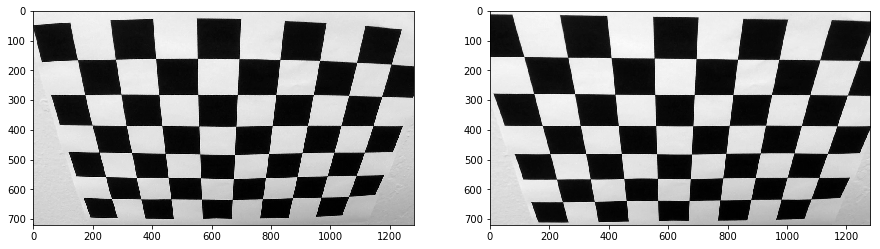

In [4]:
%matplotlib inline
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(gray_undist,cmap="gray")

# Testing test Images after calibrating the camera

In [5]:
#test_images = glob.glob("test_images/test*.jpg")
test_image1 = cv2.imread("test_images/test1.jpg")
test_image2 = cv2.imread("test_images/test2.jpg")
test_image3 = cv2.imread("test_images/test3.jpg")
test_image4 = cv2.imread("test_images/test4.jpg")
test_image5 = cv2.imread("test_images/test5.jpg")
test_image6 = cv2.imread("test_images/test6.jpg")
str8_lines_1 = cv2.imread("test_images/straight_lines1.jpg")
str8_lines_2 = cv2.imread("test_images/straight_lines2.jpg")

In [6]:
undistorted_test_image1 = correct_for_distortion(test_image1, mtx, dist)
undistorted_test_image2 = correct_for_distortion(test_image2, mtx, dist)
undistorted_test_image3 = correct_for_distortion(test_image3, mtx, dist)
undistorted_test_image4 = correct_for_distortion(test_image4, mtx, dist)
undistorted_test_image5 = correct_for_distortion(test_image5, mtx, dist)
undistorted_test_image6 = correct_for_distortion(test_image6, mtx, dist)
undistorted_str8_lines_1 = correct_for_distortion(str8_lines_1, mtx, dist)
undistorted_str8_lines_2 = correct_for_distortion(str8_lines_2, mtx, dist)

# Undistorted test image 1 

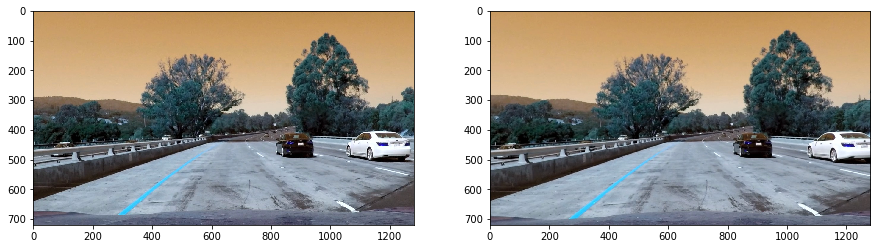

In [7]:
# test-image-1, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image1)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image1)

# Undistorted test image 2 

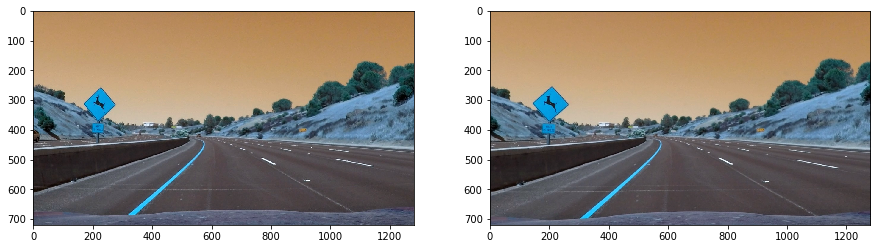

In [8]:
# test-image-2, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image2)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image2)

# Undistorted test image 3

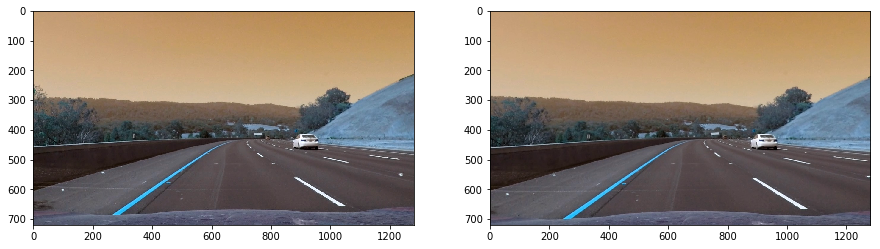

In [9]:
# test-image-3, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image3)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image3)

# Undistorted test image 4

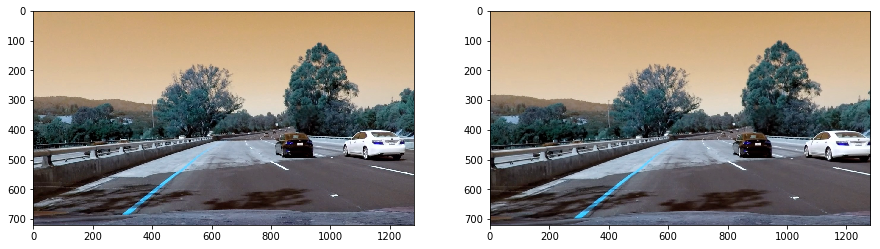

In [10]:
# test-image-4, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image4)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image4)

# Undistorted test image 5

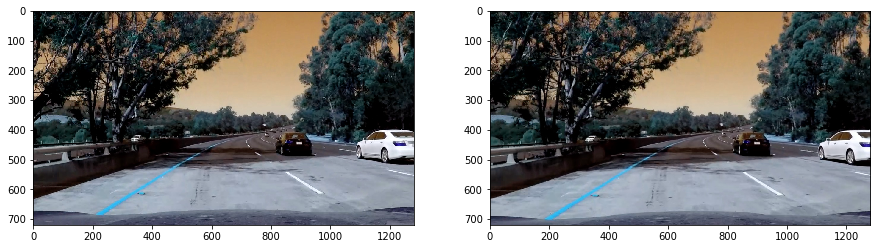

In [11]:
# test-image-5, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image5)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image5)

# Undistorted test image 6 

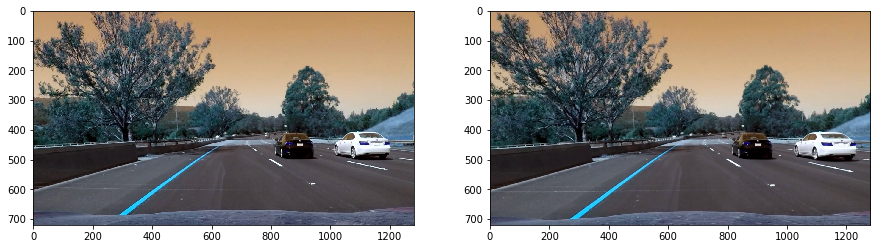

In [12]:
# test-image-6, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(test_image6)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_test_image6)

# Undistorted straight lines 1 

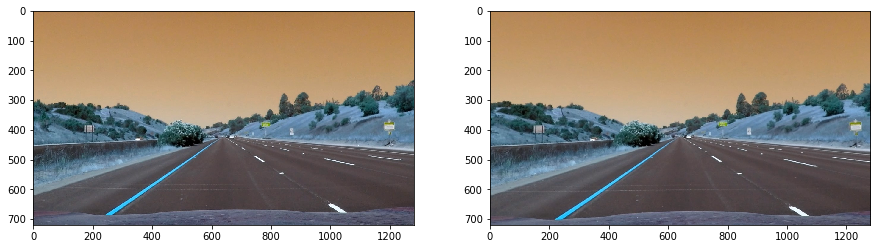

In [13]:
# straight_lines_1, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(str8_lines_1)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_str8_lines_1)

# Undistorted straight lines 2 

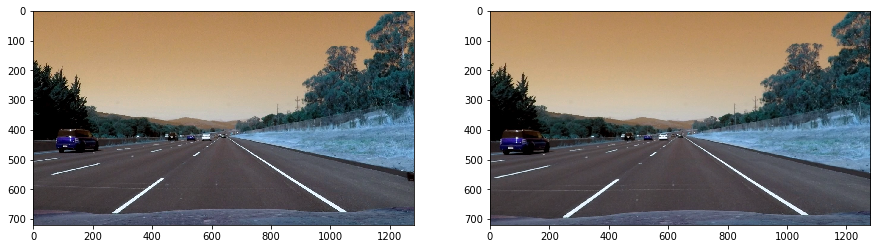

In [14]:
# straight_lines_2, original on the left and undistorted on the right
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(121)
ax.imshow(str8_lines_2)
ax2 = f.add_subplot(122)
ax2.imshow(undistorted_str8_lines_2)